In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def rk4(f, a, b, N, r0, params = []):
    h = (b - a) / N
    ts = np.linspace(a, b, N)
    r = np.zeros((len(r0), N), float)
    r[:, 0] = r0
    for i, t in enumerate(ts[1:]):
        r_t = r[:,i]
        k1 = h * f(r_t, t, *params)
        k2 = h * f(r_t + .5 * k1, t + .5 * h, *params)
        k3 = h * f(r_t + .5 * k2, t + .5 * h, *params)
        k4 = h * f(r_t + k3, t + h, *params)
        r[:,i + 1] = r_t + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return ts, r

$$ \frac{d \theta}{dt} = \omega $$

$$ \frac{d \omega}{dt} = -\frac{g}{l} \sin \theta $$

In [9]:
def f(r, t, l, g):
    x, y = r
    return np.array([y, - g / l * np.sin(x)])

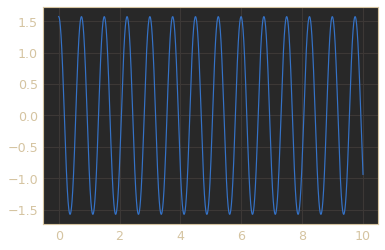

In [14]:
t, r = rk4(f, 0, 10, 10000, [np.pi/2, 0], [.1, 9.8])
plt.plot(t, r[0])
plt.show()